# Travel Domain (Regression Proble)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_excel(r'D:\Learnbay\Weekend Project Sunduram sir\TRAVEL DOMAIN\airline_dataset.xlsx')

In [3]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
dataset.shape

(10683, 11)

## Information

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Missing Value Treatement

In [7]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
dataset.isnull().sum() / len(dataset) *100 

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
dataset.isnull().sum() / len(dataset) *100 

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

## Describe

In [12]:
dataset.describe(include=['object'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


In [13]:
dataset['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

## EDA 
- Automation (dtale)

In [14]:
# import dtale
# dtale.show(dataset)

## Handling Categorical Data (EDA)
- independent vs dependent variable 
- encoding 

In [15]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Date_of_Journey
- Date_of_Journey is in Object from but actually it's in datetime format
- seprate it into 
- journey_day 
- journey_month
- year not required becasuse it's 2019 dataset (2019 is commen)


In [16]:
dataset['journey_day'] = pd.to_datetime(dataset['Date_of_Journey']).dt.day
dataset['journey_month'] = pd.to_datetime(dataset['Date_of_Journey']).dt.month
dataset['journey_year'] = pd.to_datetime(dataset['Date_of_Journey']).dt.year

In [17]:
dataset.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019


In [18]:
dataset['journey_year'].value_counts()

journey_year
2019    10682
Name: count, dtype: int64

- no need for Date_of_Journey & journey_year  now

In [19]:
dataset.drop(['Date_of_Journey' , 'journey_year'] , inplace=True , axis=1)

In [20]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  journey_day      10682 non-null  int32 
 11  journey_month    10682 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 1001.4+ KB


### Dep_Time         
- Dep_Time is in Object from but actually it's in datetime format
- seprate it into 
- dep_hour 
- dep_min
- seconds will not preety much impact on Dep_Time

In [22]:
dataset['dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute

In [23]:
dataset.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


- no need for Dep_Time & journey_year  now

In [24]:
dataset.drop(['Dep_Time'] , inplace=True , axis=1)

In [25]:
dataset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   journey_day      10682 non-null  int32 
 10  journey_month    10682 non-null  int32 
 11  dep_hour         10682 non-null  int32 
 12  dep_min          10682 non-null  int32 
dtypes: int32(4), int64(1), object(8)
memory usage: 1001.4+ KB


### Arrival_Time
- Arrival_Time comming in Object format 
- and it's containing days and month in some recods 
- we need only hour and minutes 

In [27]:
dataset['arr_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['arr_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute

In [28]:
dataset.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25


- No need for Arrival_Time now 

In [29]:
dataset.drop(['Arrival_Time'] , inplace=True , axis=1)

In [30]:
dataset.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   journey_day      10682 non-null  int32 
 9   journey_month    10682 non-null  int32 
 10  dep_hour         10682 non-null  int32 
 11  dep_min          10682 non-null  int32 
 12  arr_hour         10682 non-null  int32 
 13  arr_min          10682 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 1001.4+ KB


### Duration         
- duration column contain some recods has only hours & some has only minutes 
- but to convert inot datetime we need both hours and minutes 
- so we convert the recods into list and then insert the missing hours or missing minutes onto the records 
- then we seprate the min and hours 

In [32]:
duration = list(dataset['Duration'])

In [33]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

In [34]:
duration_hour = []
duration_min = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split('h')[0]))
    duration_min.append(int(duration[i].split('m')[0].split()[-1]))

In [35]:
dataset['duration_hour'] = duration_hour
dataset['duration_min'] = duration_min

In [36]:
dataset.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0


- now no need for Duration

In [37]:
dataset.drop(['Duration'] , inplace=True , axis=1)

In [38]:
dataset.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int32 
 8   journey_month    10682 non-null  int32 
 9   dep_hour         10682 non-null  int32 
 10  dep_min          10682 non-null  int32 
 11  arr_hour         10682 non-null  int32 
 12  arr_min          10682 non-null  int32 
 13  duration_hour    10682 non-null  int64 
 14  duration_min     10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


### Airline
- it's nominal data
- One-Hot-Encoder
- Airline vs Price Analysis (bia-variate analysis)

In [40]:
dataset['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

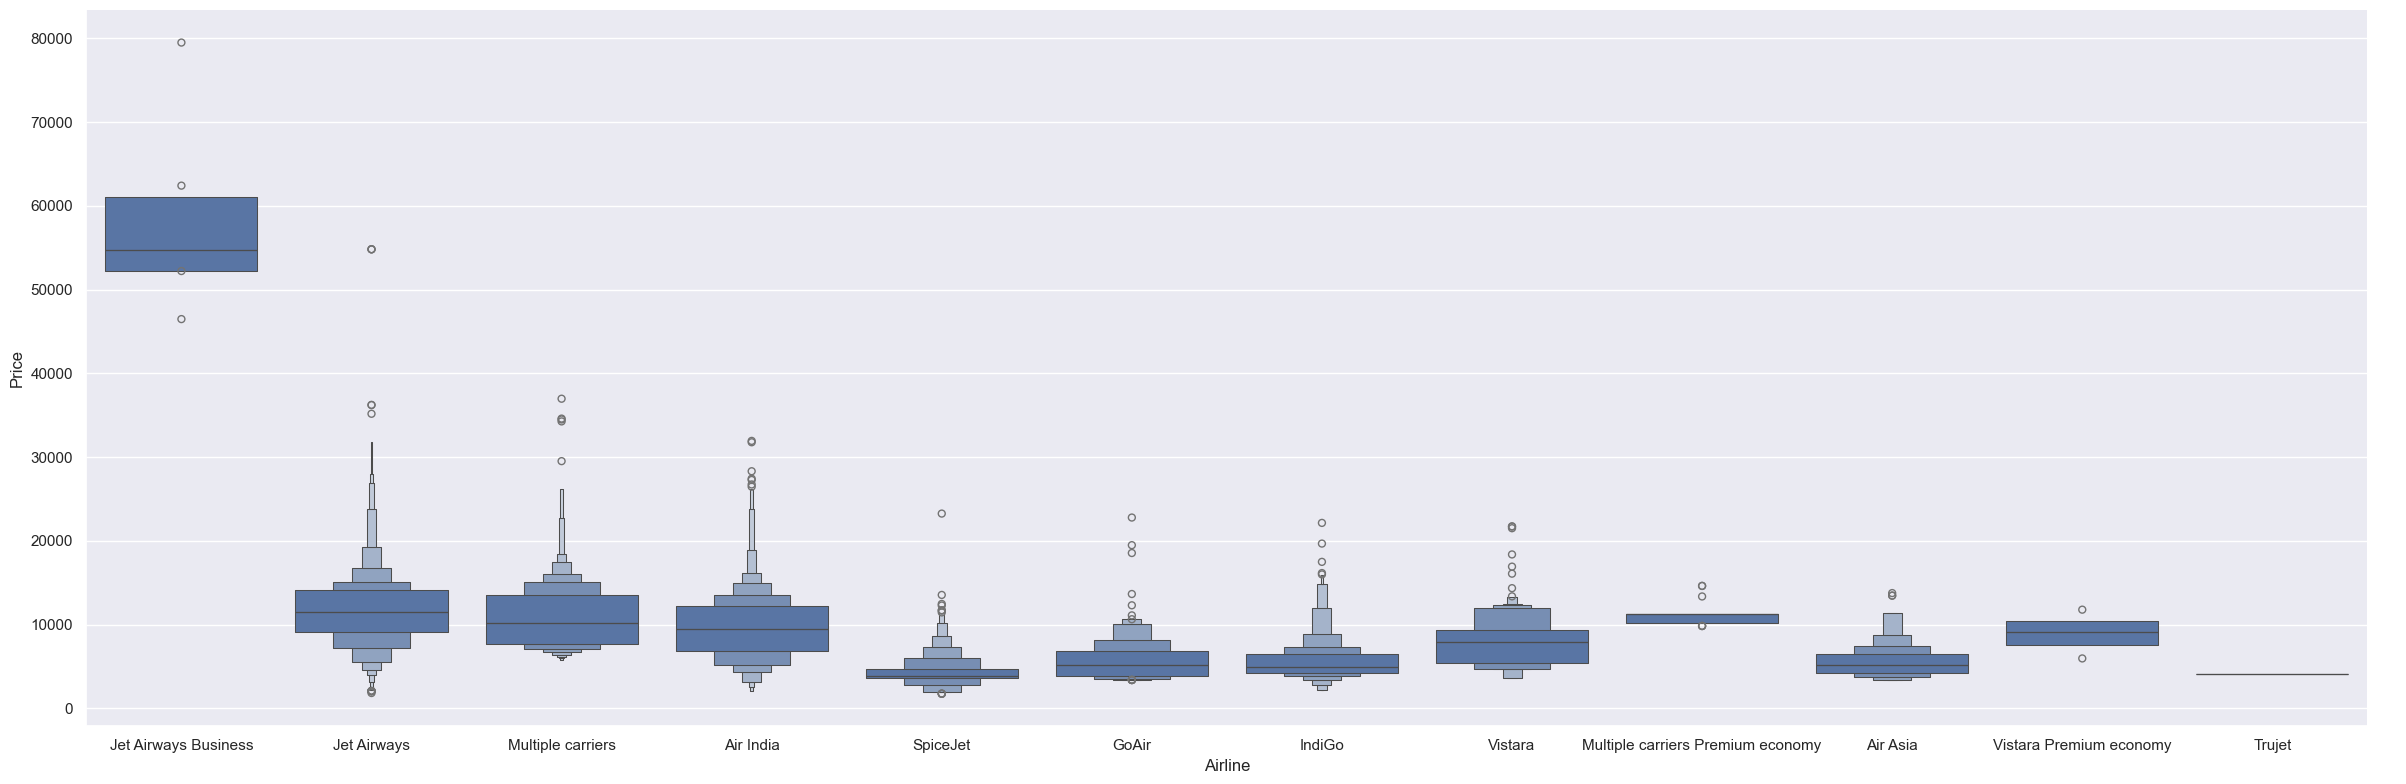

In [41]:
sns.catplot(x='Airline',y='Price',data=dataset.sort_values('Price',ascending=False) , kind='boxen' , height=8 , aspect=3)
plt.show()

- From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

In [42]:
Airline = dataset[['Airline']]
Airline = pd.get_dummies(Airline , drop_first=True , dtype='int64')
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source
- it's nominal data
- One-Hot-Encoder
- Source vs Price Analysis (bia-variate analysis)

In [43]:
dataset['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

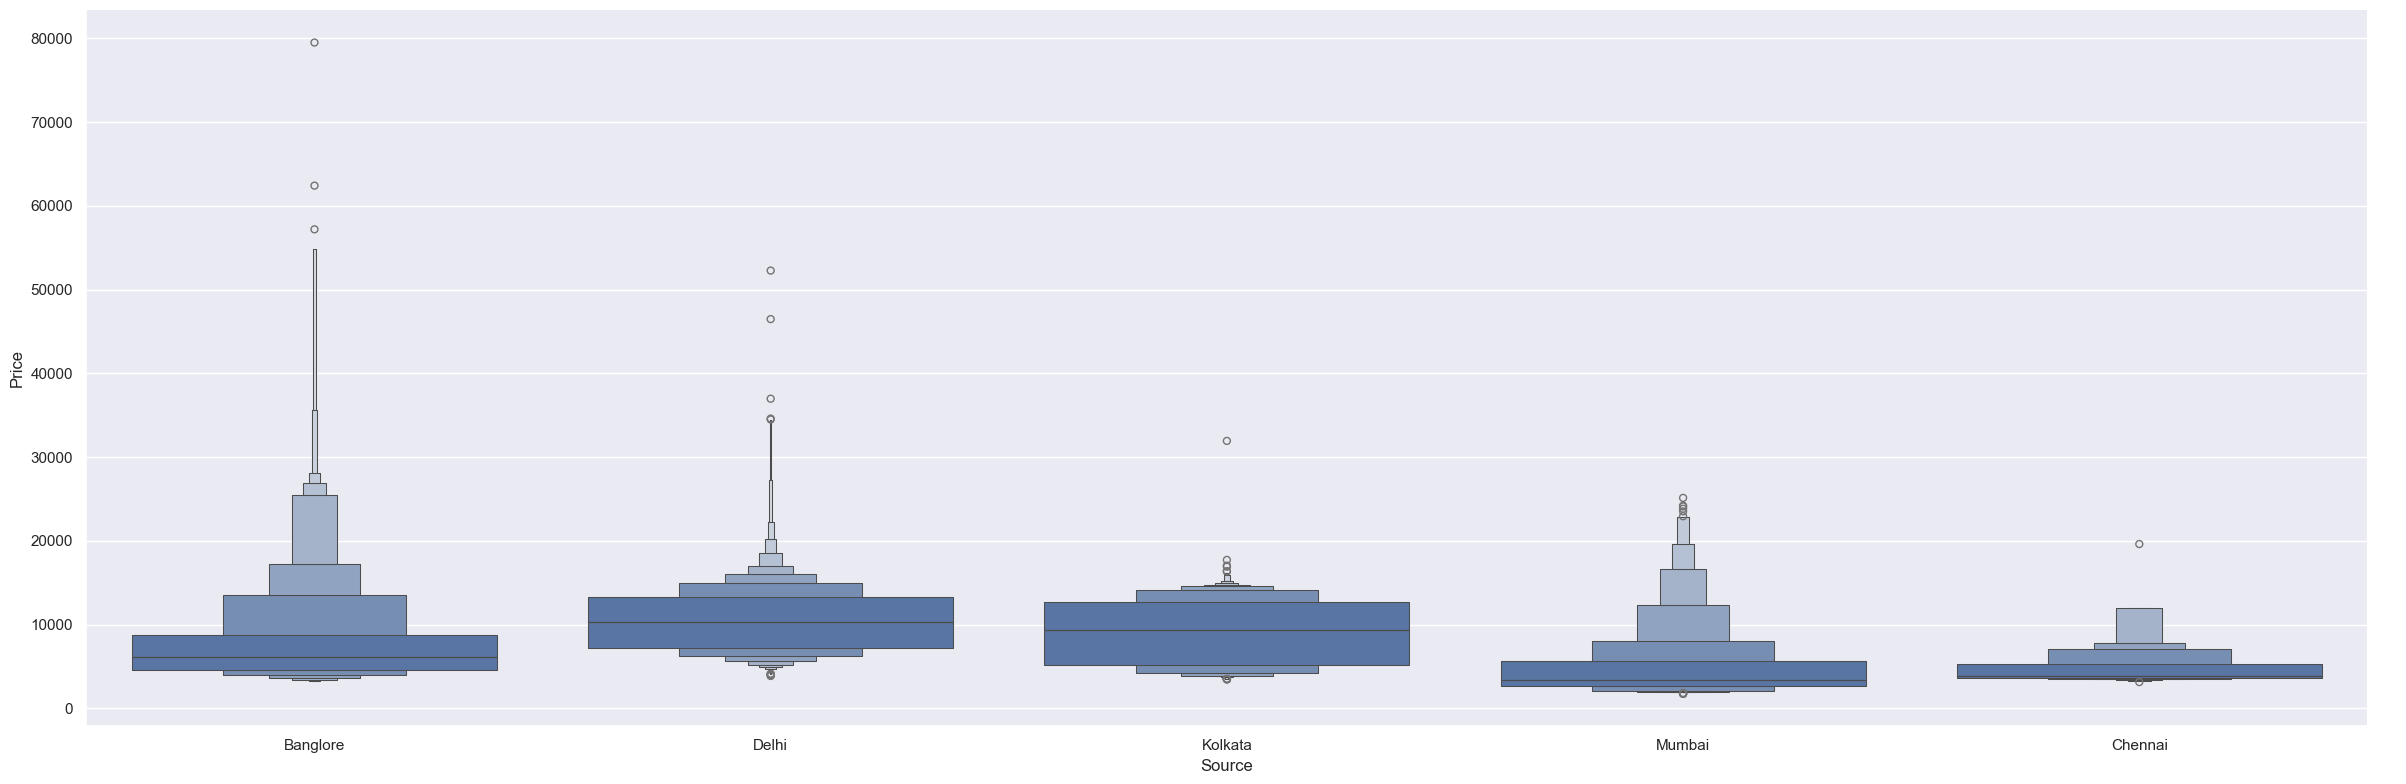

In [44]:
sns.catplot(x='Source' , y='Price' , data=dataset.sort_values('Price' , ascending=False) , kind='boxen' , height=8 , aspect=3)
plt.show()

In [45]:
Source = dataset[['Source']]
Source = pd.get_dummies(Source , drop_first=True , dtype='int64')
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Destination
- it's nominal data
- One-Hot-Encoder
- Destination vs Price Analysis (bia-variate analysis)

In [46]:
dataset['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

- in Delhi only one airport is there i.e(Indira Gandhi International Airport)
- so we convert New Delhi to Delhi

In [47]:
dataset['Destination'] = np.where(dataset['Destination'] == 'New Delhi' , 'Delhi' ,  dataset['Destination'])

In [48]:
dataset['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

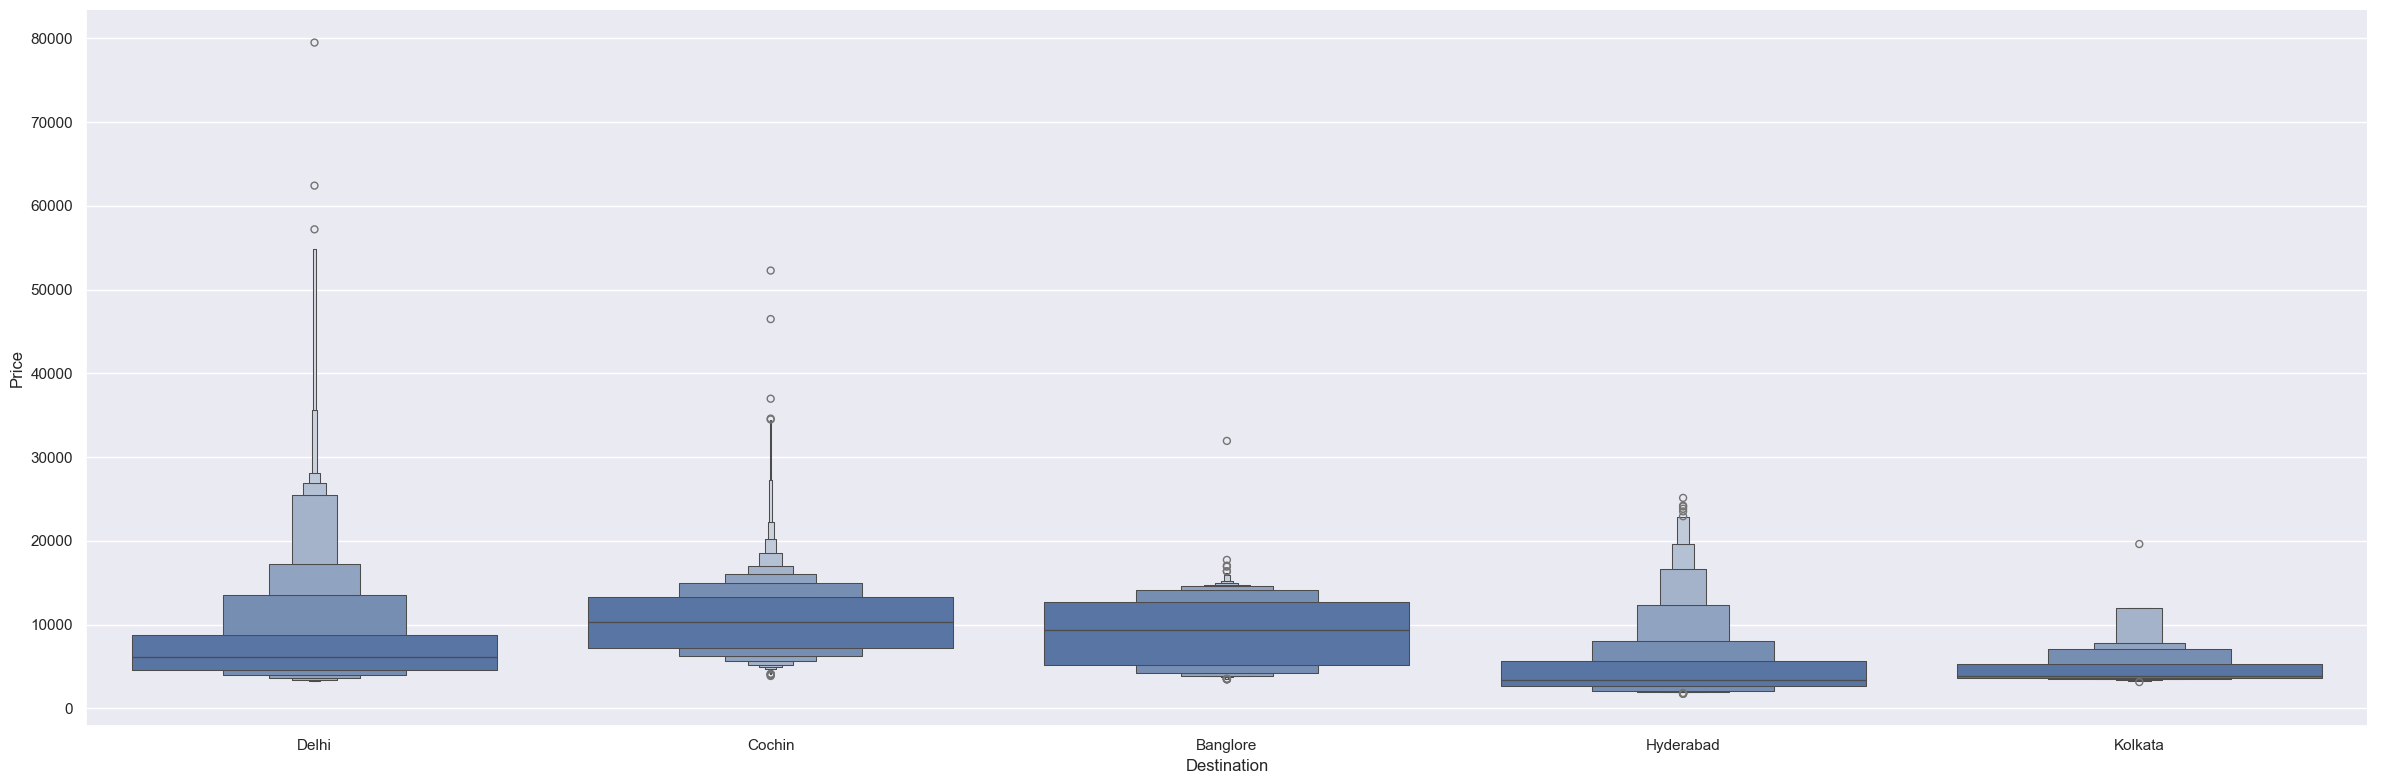

In [49]:
sns.catplot(x='Destination' , y='Price' , data=dataset.sort_values('Price' , ascending=False) , kind='boxen' , height=8 , aspect=3)
plt.show()

In [50]:
Destination = dataset[['Destination']]
Destination = pd.get_dummies(Destination , drop_first=True , dtype='int64')
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


## Route

In [51]:
dataset['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [52]:
dataset['Route'].nunique()

128

- we don't need Route 
- because we already taken the source, destination , arrivel hours and min , duration hours and minutes 
- so we don't need the Route 

In [53]:
dataset.drop(['Route'] , inplace=True , axis=1)

In [54]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Total_Stops
- it's Ordinal data
- LabelEncoder
- Total_Stops vs Price Analysis (bia-variate analysis)

In [55]:
dataset['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

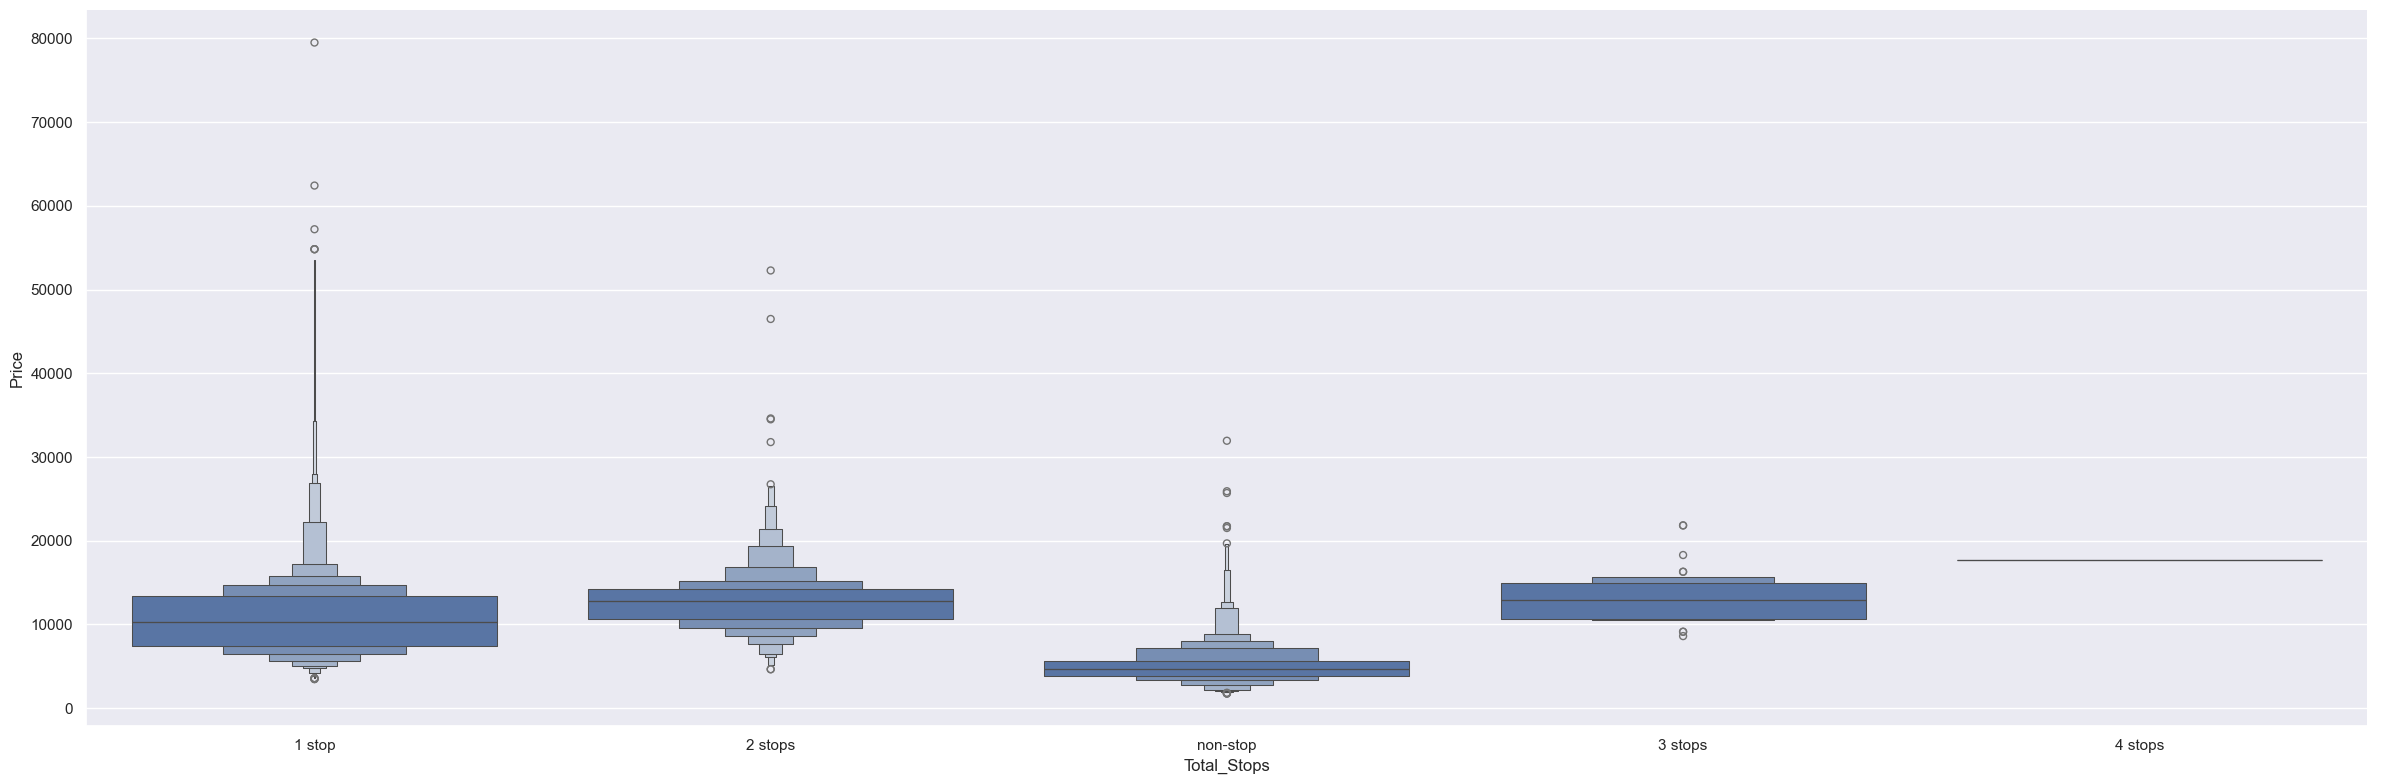

In [56]:
sns.catplot(x='Total_Stops' , y='Price' , data=dataset.sort_values('Price' , ascending=False) , kind='boxen' , height=8  ,aspect=3)
plt.show()

In [57]:
dataset["Total_Stops"].replace(
    {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4} , inplace=True
)

In [58]:
dataset['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

## Additional_Info

In [59]:
dataset['Additional_Info'].value_counts(normalize=True)

Additional_Info
No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: proportion, dtype: float64

- 78% data is only for No info and reset is divided between then 
- no need for Additional_Info

In [60]:
dataset.drop(['Additional_Info'] , inplace=True   , axis=1)

In [61]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45


## Add Airline, Source, Destination 
- Encoded 

In [62]:
final_dataset = pd.concat([dataset , Airline , Source ,Destination] , axis=1)

In [63]:
final_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
final_dataset.drop(columns=['Airline', 'Source', 'Destination'] , inplace=True)

In [65]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   journey_day                                10682 non-null  int32
 3   journey_month                              10682 non-null  int32
 4   dep_hour                                   10682 non-null  int32
 5   dep_min                                    10682 non-null  int32
 6   arr_hour                                   10682 non-null  int32
 7   arr_min                                    10682 non-null  int32
 8   duration_hour                              10682 non-null  int64
 9   duration_min                               10682 non-null  int64
 10  Airline_Air India                          10682 no

## Split into Dependent & Independent variable

In [66]:
x = final_dataset.drop(['Price'] , axis=1 )
y = final_dataset['Price']

In [67]:
x.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [68]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

## Correlation between Ind & Dep variable
- Heatmap

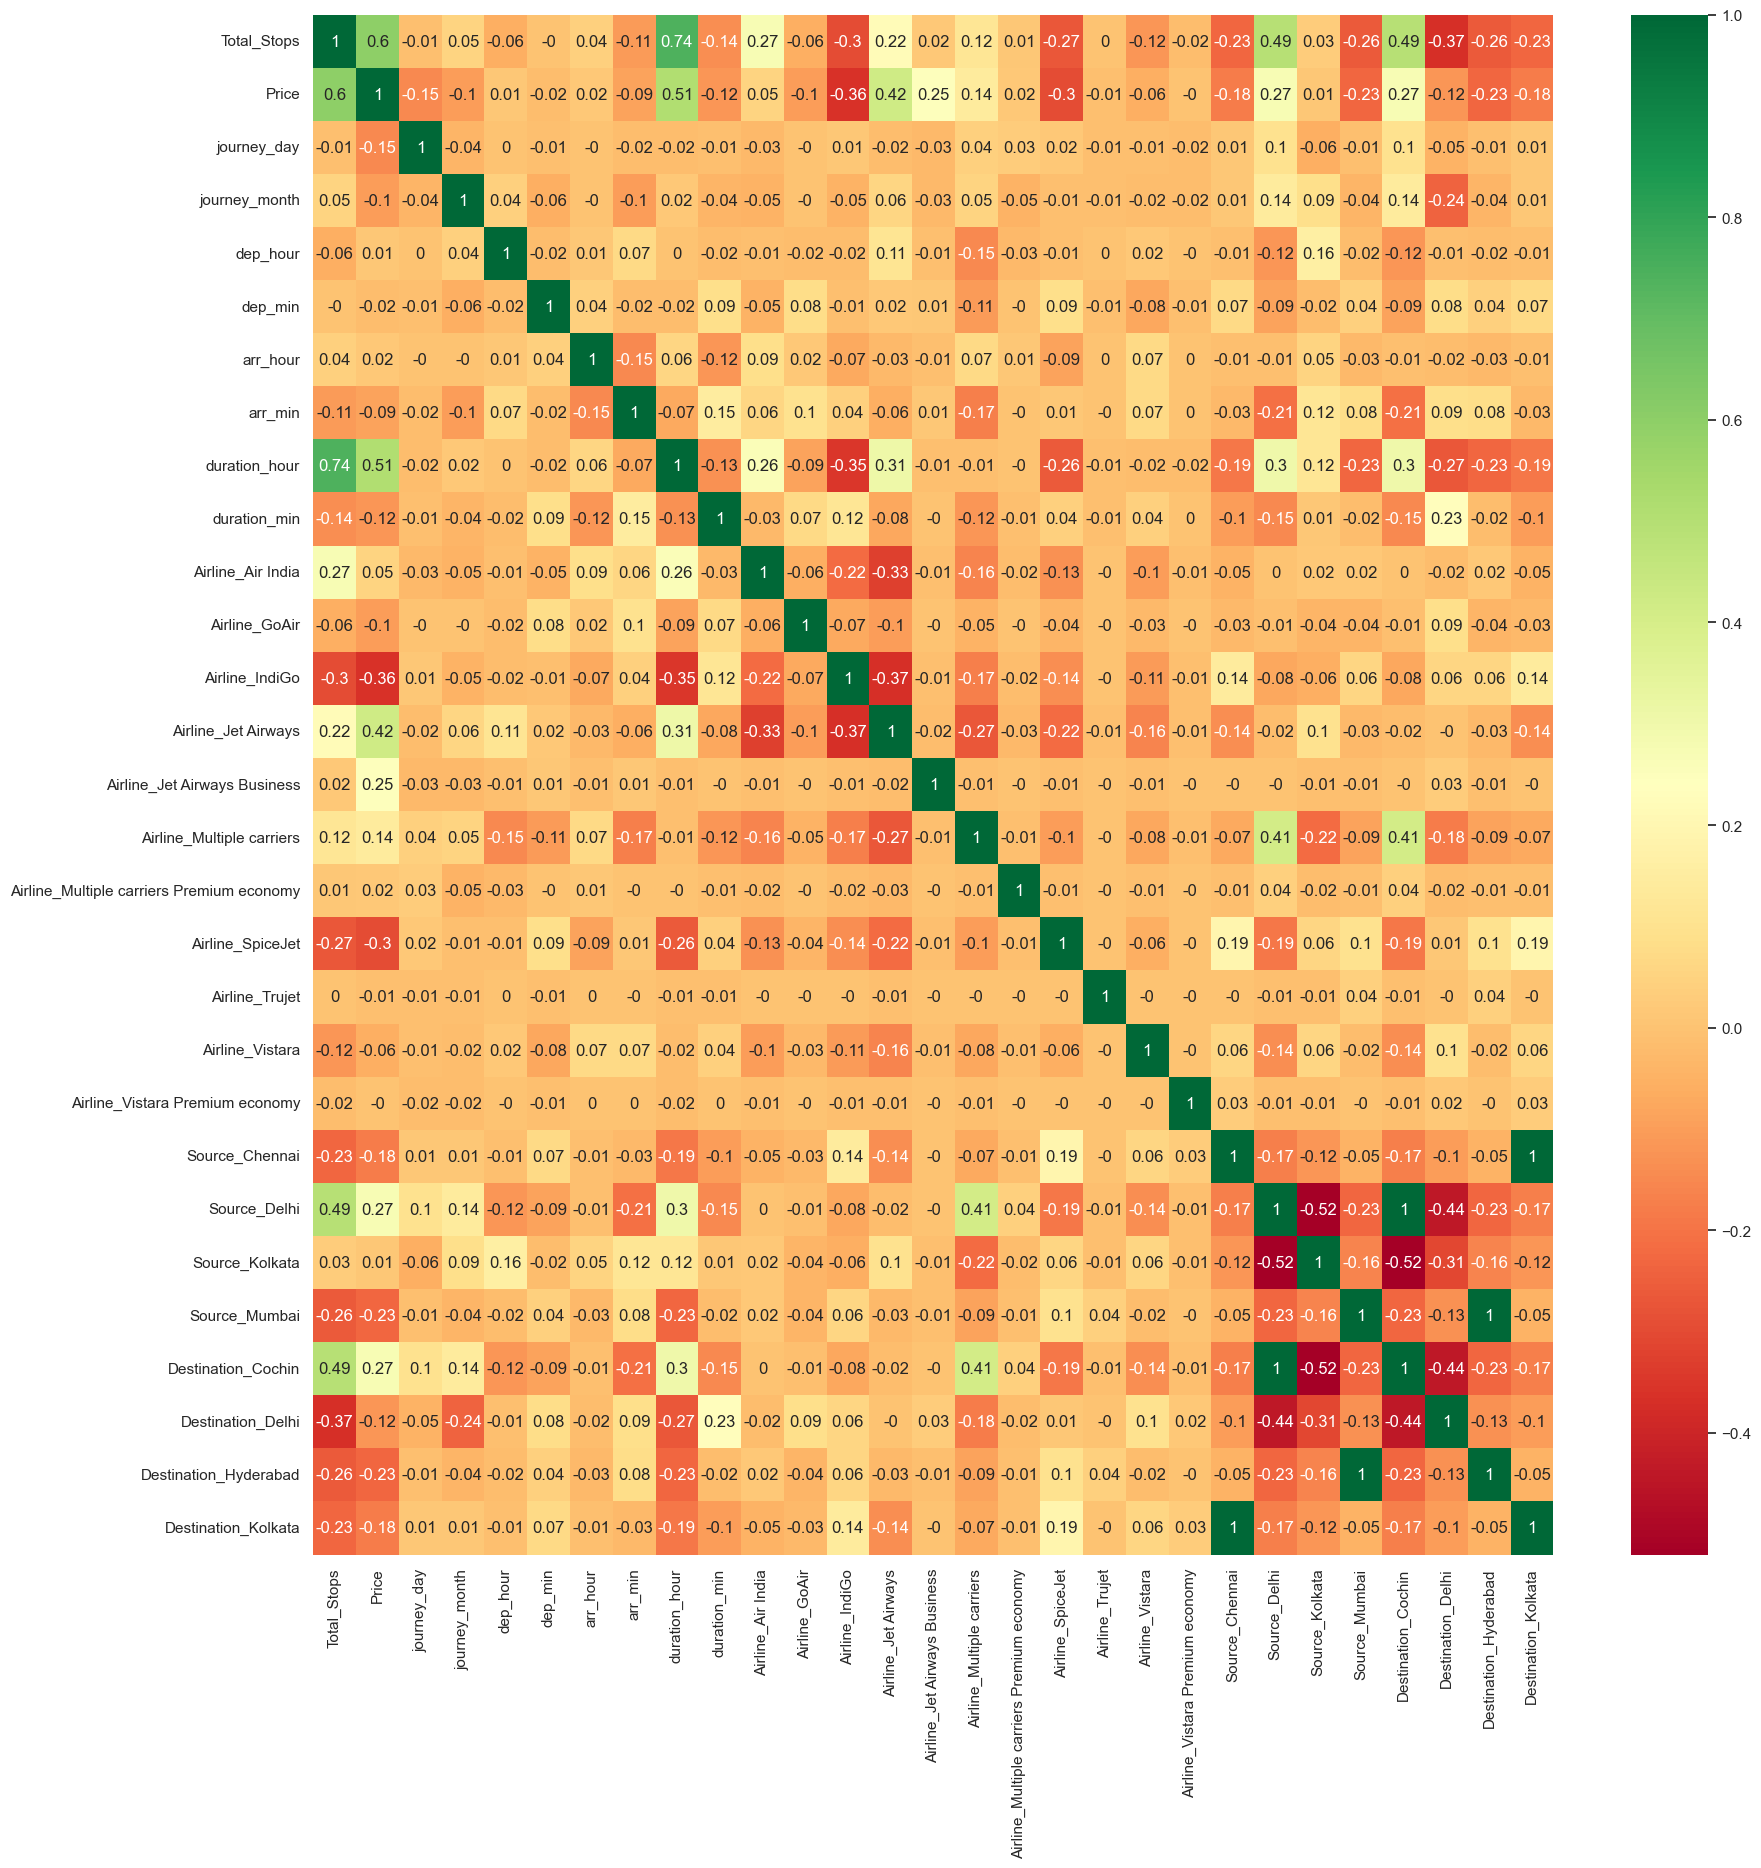

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(round(final_dataset.corr() , 2) , annot=True , cmap='RdYlGn')
plt.show()

- Price vs Other Features
- There is no multicollinearity problem
- all values is < 0.75 and greater than -0.75

## Feature Scalling 

In [70]:
final_dataset.describe()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,0.163921,0.018161,0.192192,0.360326,0.000562,0.111964,0.001217,0.076577,0.000094,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.205673,0.065250,0.035667
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,0.370221,0.133541,0.394042,0.480117,0.023695,0.315337,0.034866,0.265932,0.009676,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.404212,0.246978,0.185468
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Feature scalling not required 
- none of the feature has large range

## Find Significant variable for predicting price
- To check which variable is more significent to impact price 
- Feature Importance

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [72]:
selection.feature_importances_

array([2.62826075e-01, 1.43229485e-01, 5.81488730e-02, 2.36855105e-02,
       2.11395773e-02, 2.78472492e-02, 1.94372156e-02, 1.10713049e-01,
       1.86342730e-02, 8.89119860e-03, 2.06021683e-03, 1.86833685e-02,
       1.30282743e-01, 6.63948302e-02, 1.76646060e-02, 8.52916100e-04,
       5.94405629e-03, 1.24100154e-04, 4.56405841e-03, 6.73890442e-05,
       8.41971959e-04, 7.04745373e-03, 4.84420508e-03, 7.91160934e-03,
       1.03835094e-02, 1.92076927e-02, 7.83565578e-03, 7.37111170e-04])

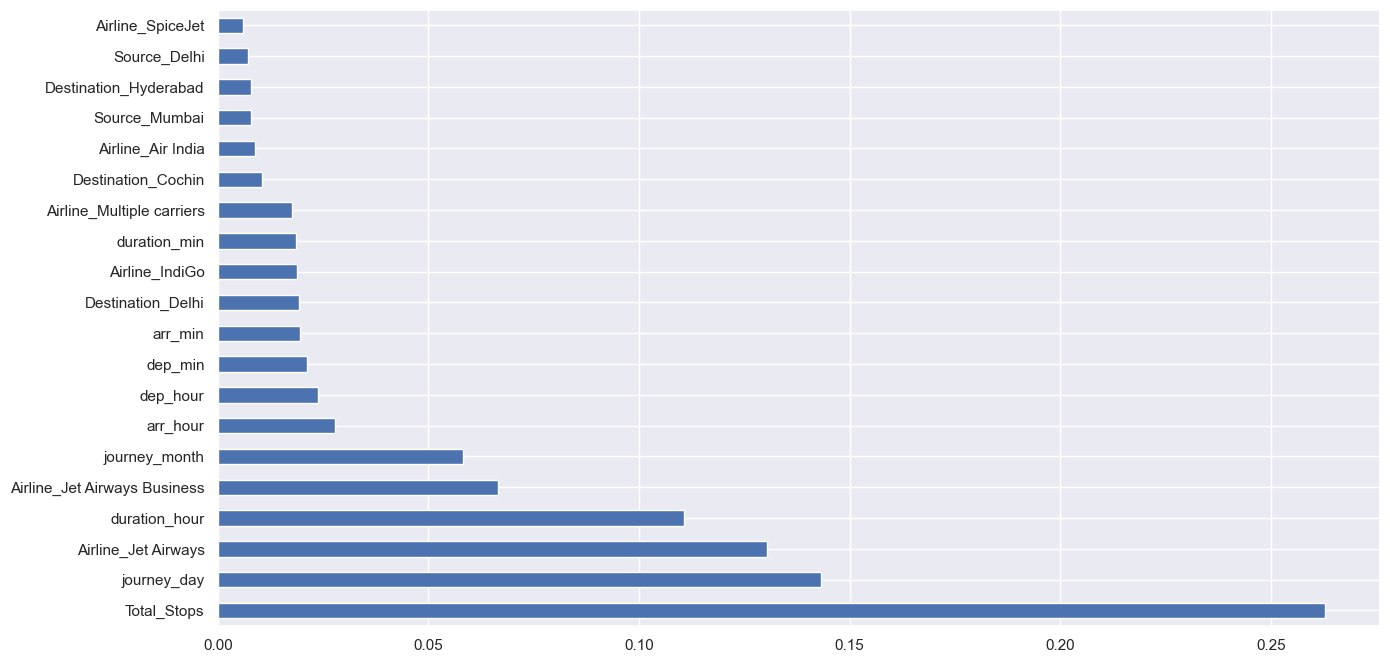

In [73]:
plt.figure(figsize=(15,8))
feature_imp = pd.Series(selection.feature_importances_ , index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

## Split into train and test

In [74]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=42) 

In [75]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((7477, 28), (3205, 28), (7477,), (3205,))

## Build Model

In [76]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

def predict(ml_model):

    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)

    print("Training score: {}".format(model.score(x_train,y_train)))

    train_cross = cross_val_score(model , x_train , y_train ,cv=5)

    print("Training cross validation score : {}".format(train_cross.mean()))

    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions))
    
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    RMSE = np.sqrt(mean_squared_error(y_test,predictions))
    print('RMSE:{}'.format(RMSE))

    print('\n')
    print("Error Rate in %  {}".format(round(RMSE/(max(y) - min(y)), 3)))
     
    sns.distplot(y_test-predictions)      

### RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9549673448096904
Training cross validation score : 0.8033981974369023
Predictions are: [16732.83  5617.59  8856.69 ...  5861.42  3371.73  7245.11]


r2 score is: 0.7983857479696991
MAE:1177.9579957308335
MSE:4113117.553015207
RMSE:2028.0822352693706


Error Rate in %  0.026


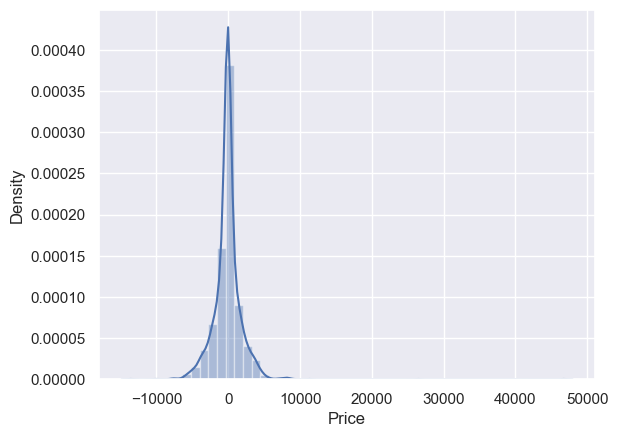

In [78]:
predict(RandomForestRegressor())

### LogisticRegression

Model is: LogisticRegression()
Training score: 0.2507690250100308
Training cross validation score : 0.19446273675173928
Predictions are: [13377  5135 14388 ...  4823  3100  6442]


r2 score is: 0.12015805981666594
MAE:2502.2021840873635
MSE:17949590.823088925
RMSE:4236.695743511555


Error Rate in %  0.054


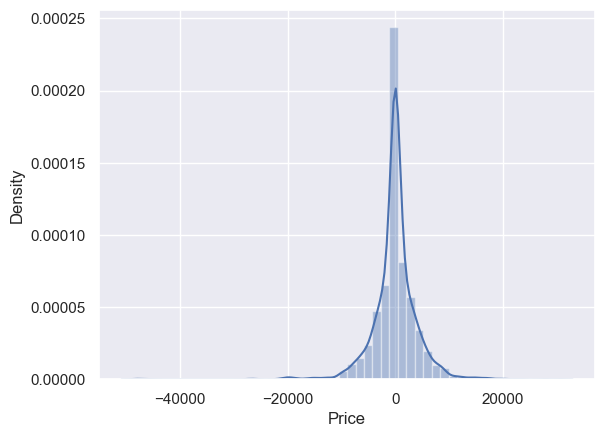

In [79]:
predict(LogisticRegression())

### KNeighborsRegressor

Model is: KNeighborsRegressor()
Training score: 0.7197618130320773
Training cross validation score : 0.5275184844024347
Predictions are: [16315.   5116.6  8441.6 ...  6970.4  4052.8  6041.2]


r2 score is: 0.5680554023183649
MAE:1899.5654290171603
MSE:8812070.023638066
RMSE:2968.513099792229


Error Rate in %  0.038


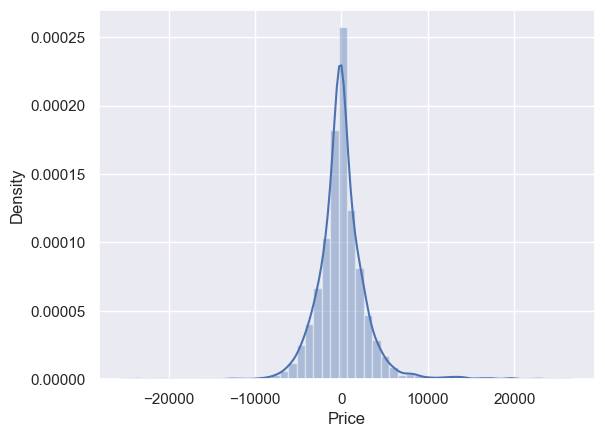

In [80]:
predict(KNeighborsRegressor())

### DecisionTreeRegressor

Model is: DecisionTreeRegressor()
Training score: 0.9729700065222148
Training cross validation score : 0.6674378232304721
Predictions are: [16840.  4959.  8452. ...  5601.  3100.  6734.]


r2 score is: 0.6932778981924207
MAE:1377.7667498699948
MSE:6257415.07923193
RMSE:2501.4825762399246


Error Rate in %  0.032


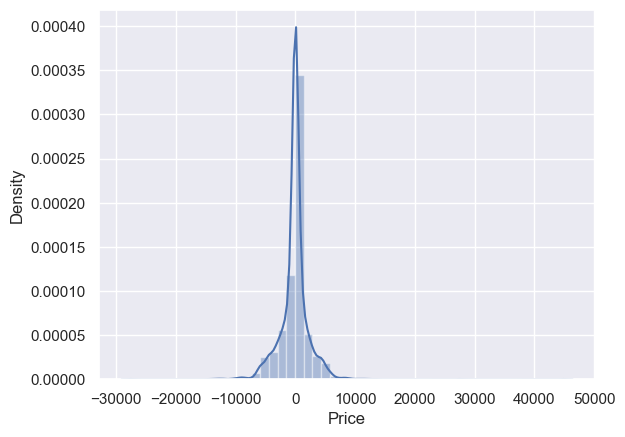

In [81]:
predict(DecisionTreeRegressor())

### GradientBoostingRegressor

Model is: GradientBoostingRegressor()
Training score: 0.7799120087475295
Training cross validation score : 0.7579706240712778
Predictions are: [15026.82781351  7243.75363824  9516.45307281 ...  4883.05123585
  3103.35700098  6971.12663418]


r2 score is: 0.7785198010694229
MAE:1513.1431205704139
MSE:4518401.277156462
RMSE:2125.653141308916


Error Rate in %  0.027


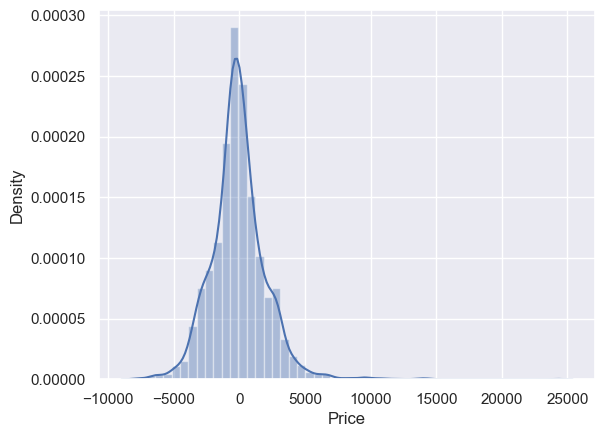

In [82]:
predict(GradientBoostingRegressor())

In [83]:
rfe = RandomForestRegressor()
rfe.fit(x_train , y_train)

RandomForestRegressor()

In [84]:
from sklearn.model_selection import cross_val_score
train = cross_val_score(rfe , x_train , y_train ,cv=5)

In [85]:
train.mean()

0.801795030010565

## HyperParameter Tunning 
- RandomizedSearchCV

In [86]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [87]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220]},
                   verbose=2)

In [88]:
rf_random.best_params_

{'n_estimators': 220, 'max_features': 'sqrt', 'max_depth': 15}

In [89]:
#predicting the values
prediction = rf_random.predict(x_test)
r2_score(y_test , prediction)

0.8276495428297058

In [90]:
rf_random.score(x_train ,y_train)

0.9265216478705472

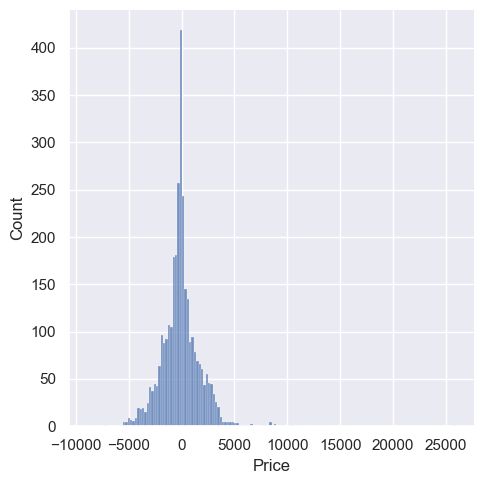

In [91]:
#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)
plt.show()

## Deployment

In [92]:
# import pickle
# pickle_out = open("price_Prediction.pkl" , "wb")
# pickle.dump(rf_random ,pickle_out) 
# pickle_out.close()